In [1]:
import pickle
from glob import glob
import cv2
from matplotlib import pyplot as plt
import random as rnd
from pandas import DataFrame as df
import numpy as np
from tqdm.notebook import tqdm

### Global values

In [2]:
DATA_DIR = "data/"

### Read images in RGB mode

In [3]:
def img_read(img_file):
    img = cv2.imread(img_file,cv2.IMREAD_UNCHANGED)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return rgb_img

test image shape (128, 128, 3)


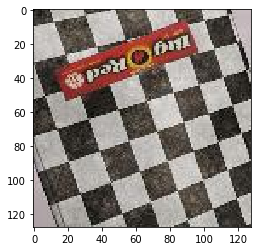

In [4]:
test_img = img_read(DATA_DIR+"candy/Big Red/big_red_0.jpg")
plt.imshow(test_img)
print("test image shape", test_img.shape)

In [5]:
CATEGORIES = []
all_data = []
for subdir in glob(DATA_DIR+"*"):
    for catdir in glob(subdir+"/*"):
        # get and add categories
        category = catdir.replace(subdir+"/", "")
        CATEGORIES.append(category)
        class_num = CATEGORIES.index(category)
        for f in glob(catdir+"/*.jpg"):
            try:
                image = img_read(f)
                all_data.append([image, class_num])
            except:
                print("Something went wrong")
                break

In [6]:
print(len(all_data))
print(len(CATEGORIES))

20355
177


In [7]:
rnd.shuffle(all_data)

#### Samples of first 10 training data. Only showing labels

In [8]:
for sample in all_data[:10]:
    print(sample[1])

84
19
91
77
113
33
63
3
54
106


In [9]:
X = []
y = []
for features, label in all_data:
    X.append(features)
    y.append(label)
data_range = int(len(all_data) * .7)
trainX = np.array(X[:data_range])
trainy = np.array(y[:data_range])
testX = np.array(X[data_range:])
testy = np.array(y[data_range:])

In [10]:
trainX.shape, trainy.shape, testX.shape, testy.shape

((14248, 128, 128, 3), (14248,), (6107, 128, 128, 3), (6107,))

In [11]:
filename = 'train_data.pkl'
fileobj = open(filename, 'wb')
pickle.dump([trainX, trainy], fileobj)
fileobj.close()
print("Done")

Done


In [12]:
filename = 'test_data.pkl'
fileobj = open(filename, 'wb')
pickle.dump([testX, testy], fileobj)
fileobj.close()
print("Done")

Done


In [13]:
cat_df = df(CATEGORIES)
cat_df.to_csv(r'categries_data.csv')
print(cat_df)

                            0
0            Pall Mall Silver
1          Dutch Berry Fusion
2       Swisher Sweet Orginal
3       White Owl White Peach
4              Optimo Diamond
..                        ...
172    Now and Later Pinapple
173           Airheads Cherry
174      Now and Later Banana
175  Now and Later Strawberry
176               Winterfresh

[177 rows x 1 columns]


#### Items with index

In [14]:
for cat in CATEGORIES:
    print(f'{CATEGORIES.index(cat)} {cat}')

0 Pall Mall Silver
1 Dutch Berry Fusion
2 Swisher Sweet Orginal
3 White Owl White Peach
4 Optimo Diamond
5 White Owl White Russian
6 Backwood Orginal
7 HD Green Sweets
8 Optimo Grape
9 Game Leaf Cognac
10 Shows Blue Palma
11 White Owl Pinapple
12 Shows Jamaican Buzz
13 HD Red
14 Game Diamond
15 HD Honey
16 Woods Leaf Golden Honey
17 Game Pinapple
18 Backwood Honey Berry
19 White Owl Emerald
20 Shows OG Kush
21 Shows Green Sweet
22 White Owl  Mango
23 Shows Kiwi Strawberry
24 Swisher Sweet Sticky Sweet
25 Woods Leaf Russian Cream
26 4K Strawberry Lemondade
27 Game Leaf Wild Berry
28 White Owl White Grape
29 Optimo Sweet
30 Swisher Sweet Mini Diamond
31 Swisher Sweet Mini
32 Optimo Blue
33 Shows Mola Island
34 White Owl Grape
35 Dutch Java Fusion
36 Dutch Mint Fusion
37 White Owl Green Sweet
38 OGK
39 4K Napa Grape
40 Shows Tropical Twista
41 Game Red Sweets
42 White Owl Tropical Twists
43 White Owl Single Silver
44 Pom Pom Red
45 Game Black Sweets
46 White Owl Silver
47 Swisher Sweet Bo